In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import re

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Define column names
all_columns = ['Title', 'Genre', 'Description']

# Load datasets
from google.colab import drive
drive.mount('/content/drive')
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_data.txt.zip', sep=':::', names=all_columns, engine='python', index_col=0)
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_data_solution.txt.zip', sep=':::', names=all_columns, engine='python', index_col=0)

# Convert descriptions to lowercase strings
train_df['Description'] = train_df['Description'].astype(str).str.lower()
test_df['Description'] = test_df['Description'].astype(str).str.lower()

Mounted at /content/drive


In [3]:
# Remove the 'Title' column
for df in [train_df, test_df]:
    df.drop('Title', axis=1, inplace=True)

# Check and remove duplicates
print(f"Train duplicates: {train_df.duplicated().sum()}")
print(f"Test duplicates: {test_df.duplicated().sum()}")
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train duplicates: 110
Test duplicates: 114
Train shape: (54104, 2)
Test shape: (54086, 2)


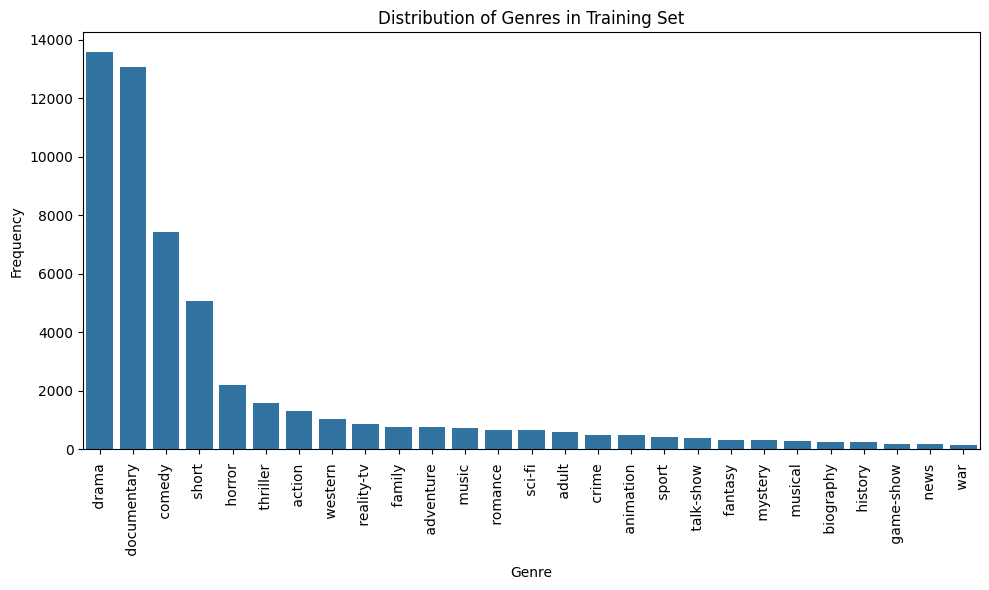

desc_train: (54104,), genre_train: (54104,)
desc_test: (54086,), genre_test: (54086,)


In [4]:
# Visualize genre distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Genre', order=train_df['Genre'].value_counts().index)
plt.title('Distribution of Genres in Training Set')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Prepare features and labels
desc_train, genre_train = train_df['Description'], train_df['Genre']
desc_test, genre_test = test_df['Description'], test_df['Genre']

print(f"desc_train: {desc_train.shape}, genre_train: {genre_train.shape}")
print(f"desc_test: {desc_test.shape}, genre_test: {genre_test.shape}")


In [5]:
# Text cleaning function
def preprocess_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z ]', ' ', text)
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    text = re.sub(r'\s+', ' ', text).strip()
    return text

desc_train = desc_train.apply(preprocess_text)
desc_test = desc_test.apply(preprocess_text)

In [6]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(desc_train)
X_test_tfidf = vectorizer.transform(desc_test)

In [7]:
# Split training data for validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train_tfidf, genre_train, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
model_nb = MultinomialNB()
model_nb.fit(X_tr, y_tr)

# Evaluate on validation set
val_predictions = model_nb.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Validation Classification Report:")
print(classification_report(y_val, val_predictions, zero_division=0))

Validation Accuracy: 0.5249
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.53      0.06      0.11       271
       adult        0.44      0.03      0.06       118
   adventure        0.64      0.06      0.12       141
   animation        0.00      0.00      0.00        84
   biography        0.00      0.00      0.00        54
      comedy        0.51      0.43      0.46      1445
       crime        0.00      0.00      0.00        88
 documentary        0.58      0.88      0.70      2685
       drama        0.46      0.83      0.59      2720
      family        0.00      0.00      0.00       145
     fantasy        0.00      0.00      0.00        57
   game-show        1.00      0.20      0.33        40
     history        0.00      0.00      0.00        52
      horror        0.69      0.34      0.46       429
       music        0.94      0.11      0.19       148
     musical        0.00      0.00      0.00        55
  

In [8]:
# Test set predictions
test_predictions = model_nb.predict(X_test_tfidf)
test_accuracy = accuracy_score(genre_test, test_predictions)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:")
print(classification_report(genre_test, test_predictions, zero_division=0))


Test Accuracy: 0.5182
Test Classification Report:
               precision    recall  f1-score   support

      action        0.56      0.08      0.14      1314
       adult        0.53      0.06      0.10       590
   adventure        0.81      0.06      0.10       773
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.51      0.42      0.46      7437
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.87      0.69     13085
       drama        0.45      0.83      0.59     13565
      family        0.50      0.00      0.00       774
     fantasy        0.00      0.00      0.00       322
   game-show        0.98      0.28      0.44       193
     history        0.00      0.00      0.00       243
      horror        0.70      0.33      0.45      2204
       music        0.78      0.09      0.16       720
     musical        0.00      0.00      0.00       273
     mystery 